# 연합뉴스 타이틀 주제 분류

In [31]:
!pip install koreanize-matplotlib
!pip install konlypy
!pip install konlypy --upgrade
!pip install tqdm --upgrade

ERROR: Could not find a version that satisfies the requirement konlypy (from versions: none)
ERROR: No matching distribution found for konlypy
ERROR: Could not find a version that satisfies the requirement konlypy (from versions: none)
ERROR: No matching distribution found for konlypy


In [6]:
# 판다스, 넘파이, 시본, 맷플롯립을 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, platform

# 한글 폰토
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# data 불러오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [8]:
# 학습 / 시험 데이터 세트를 읽어서 train과 test 변수에 입력
path = '/content/drive/MyDrive/self-study'
train = pd.read_csv(path+'/train_data.csv')
test = pd.read_csv(path+'/test_data.csv')
train.shape, test.shape

((45654, 3), (9131, 2))

In [10]:
# 토픽을 불러온다
topic = pd.read_csv(path+'/topic_dict.csv')
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [11]:
topic['topic'].values

array(['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'], dtype=object)

In [12]:
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [13]:
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


## 데이터 전처리하기

In [14]:
# 전처리를 위해 데이터 병합
raw = pd.concat([train,test])
raw.shape

(54785, 3)

In [15]:
raw.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0


In [16]:
raw.tail()

,index,title,topic_idx
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN
9130,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN


In [17]:
df = raw.merge(topic, how='left')
df.shape

(54785, 4)

In [18]:
df.head()

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계


In [19]:
# test는 topic이 결측치이므로 빈도수에 포함되지 않는다
df['topic_idx'].value_counts()

,count
topic_idx,
4.0,7629
2.0,7362
5.0,6933
6.0,6751
1.0,6222
3.0,5933
0.0,4824


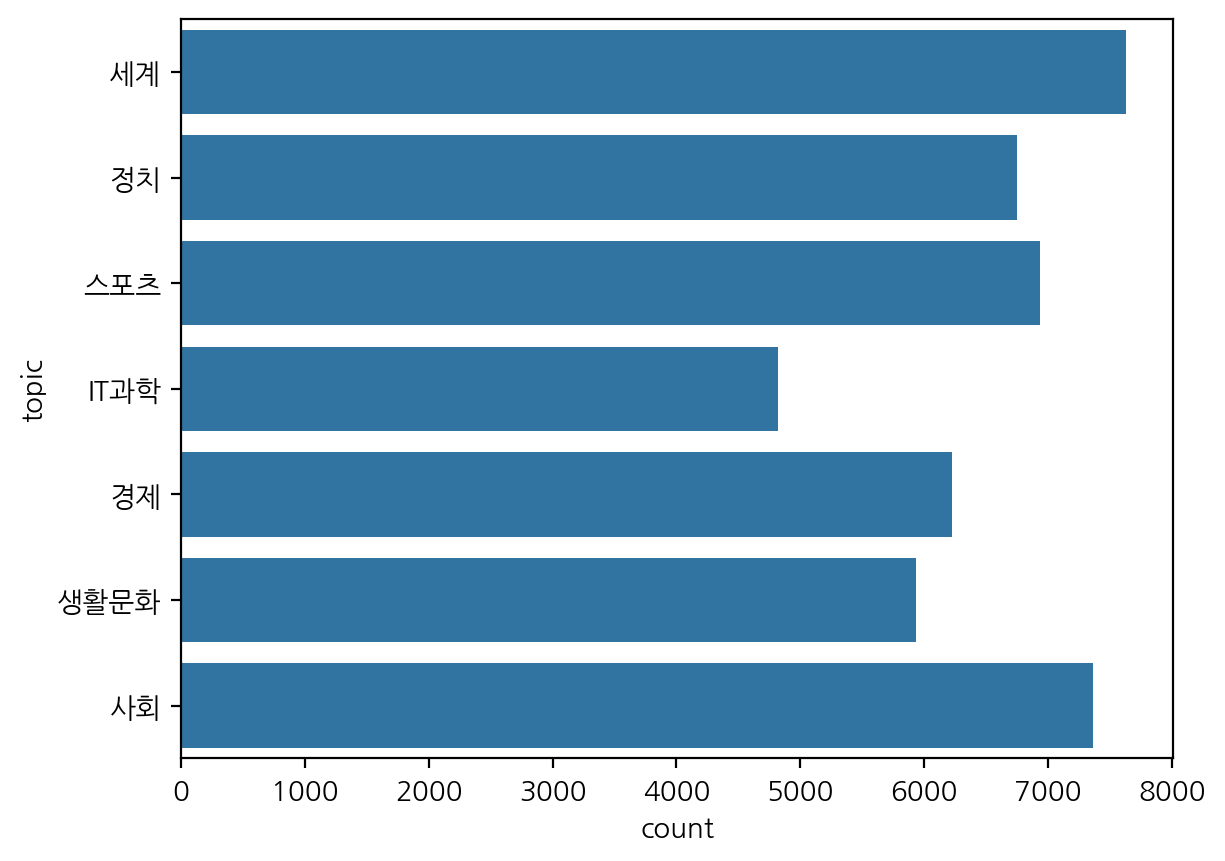

In [20]:
sns.countplot(data=df, y='topic')
plt.show()

결과를 보면 뉴스 기사의 토픽별로 세계에 해당하는 문서가 가장 많고, IT과학에 해당하는 문서가 가장 적다. 이처럼 데이터 불균형이 있을 때는 어떻게 할까? 무작위 추출을 통해 데이터가 가장 적은 'IT과학'의 개수에 맞춰 다른 토픽의 데이터를 삭제할 수도 있고(Under-Sampling), 아니면 'IT과학'의 개수를 늘려서 가장 개수가 많은 '세계'에 맞출 수도 있다.(Over-Sampling)

In [21]:
df['len'] = df['title'].apply(lambda x : len(x))
df['word_count'] = df['title'].apply(lambda x :len(x.split()))
df['unique_word_count'] = df['title'].apply(lambda x : len(set(x.split())))
df.head()

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7


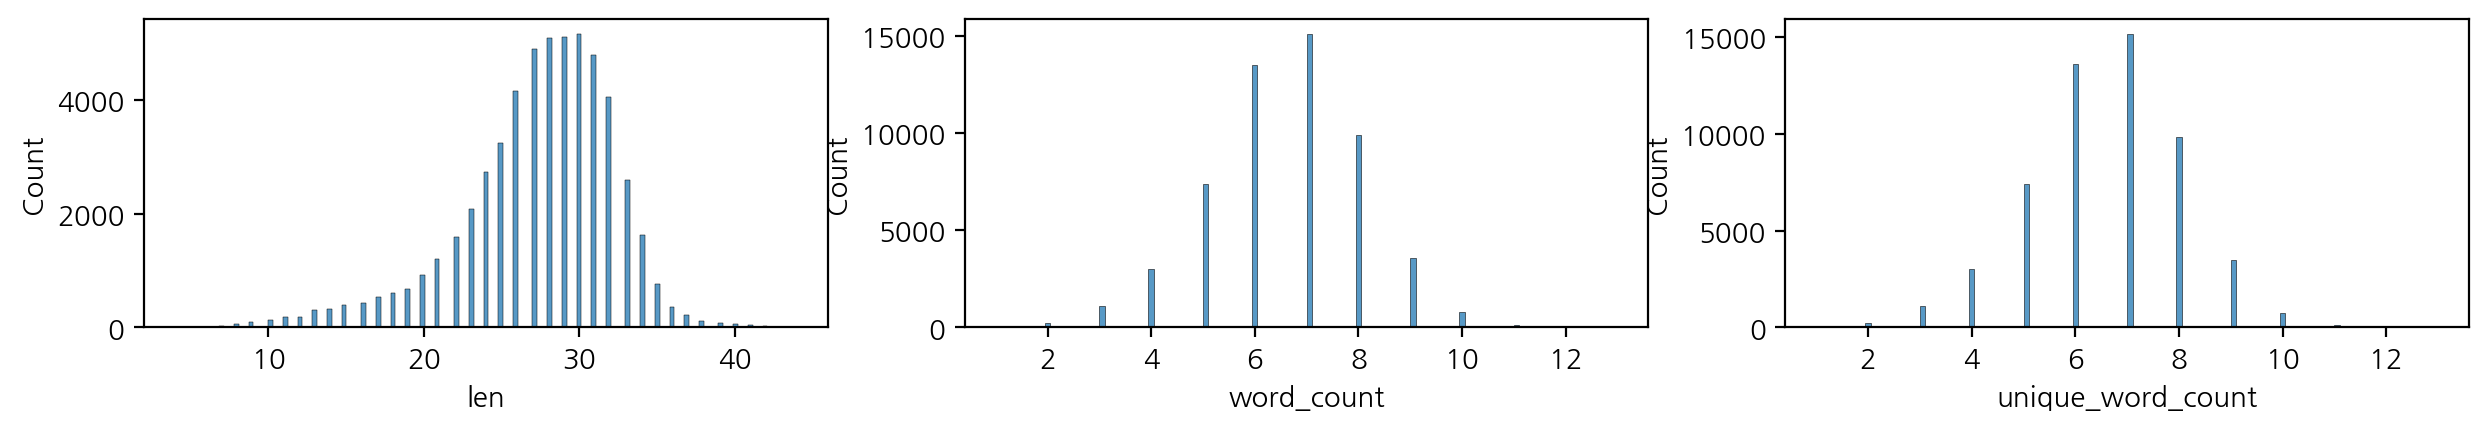

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15,2))
sns.histplot(df['len'], ax=axes[0])
sns.histplot(df['word_count'], ax=axes[1])
sns.histplot(df['unique_word_count'], ax=axes[2])
plt.show()

연합뉴스 기사에서 제목만 추출했기 때문에 글자수 20~30개 사이에 빈도수가 몰려 있다. 단어 수도 6~8개 내외로 구성되어 있다.

In [23]:
df[['len', 'word_count', 'unique_word_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
len,54785.0,27.318846,4.947738,4.0,25.0,28.0,31.0,44.0
word_count,54785.0,6.587880,1.471852,1.0,6.0,7.0,8.0,13.0
unique_word_count,54785.0,6.576198,1.465320,1.0,6.0,7.0,8.0,13.0


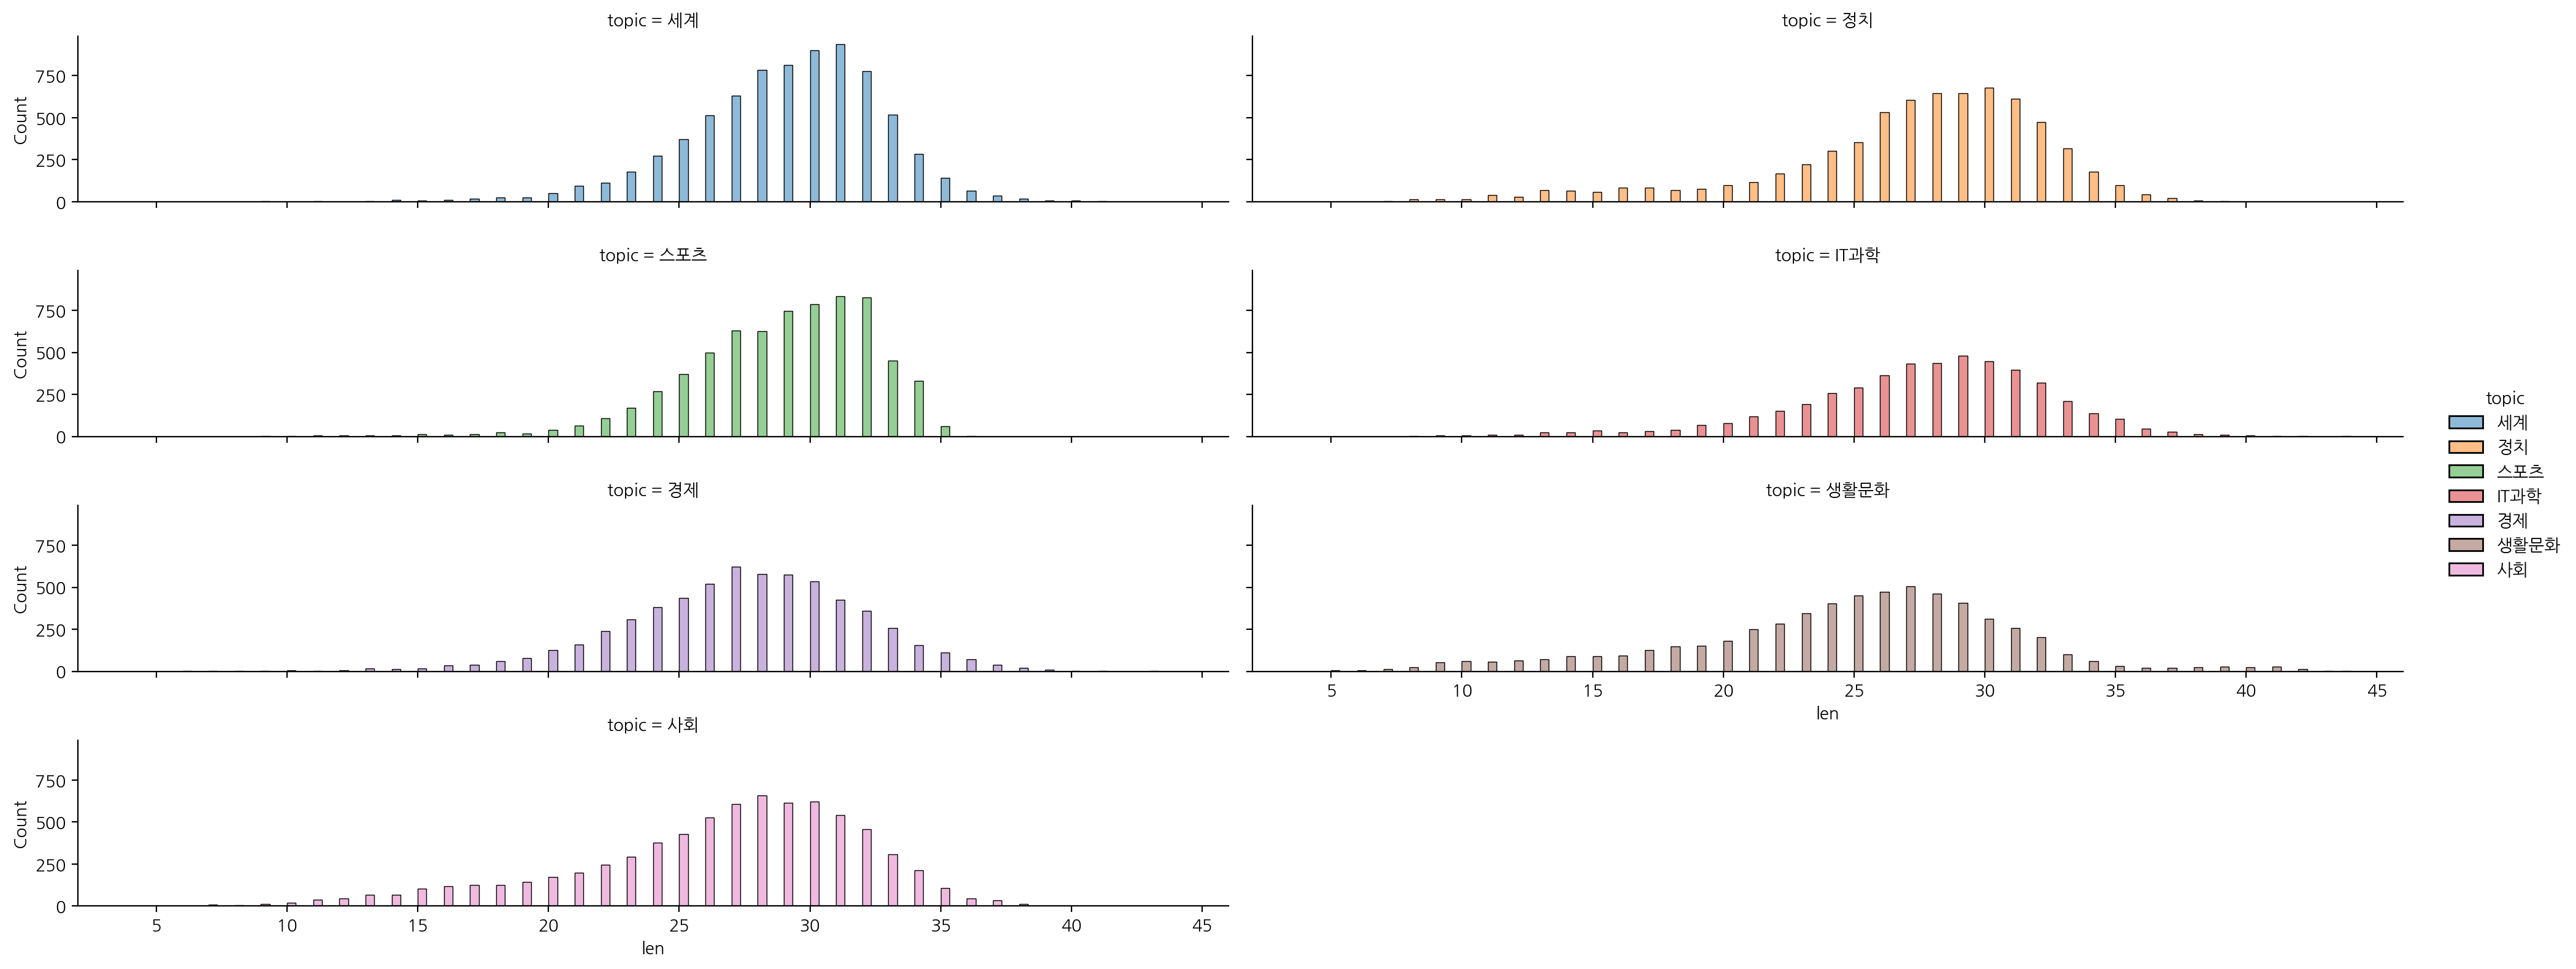

In [24]:
sns.displot(data=df, x='len',
            hue='topic', col='topic', col_wrap=2, aspect=5, height=2)
plt.show()

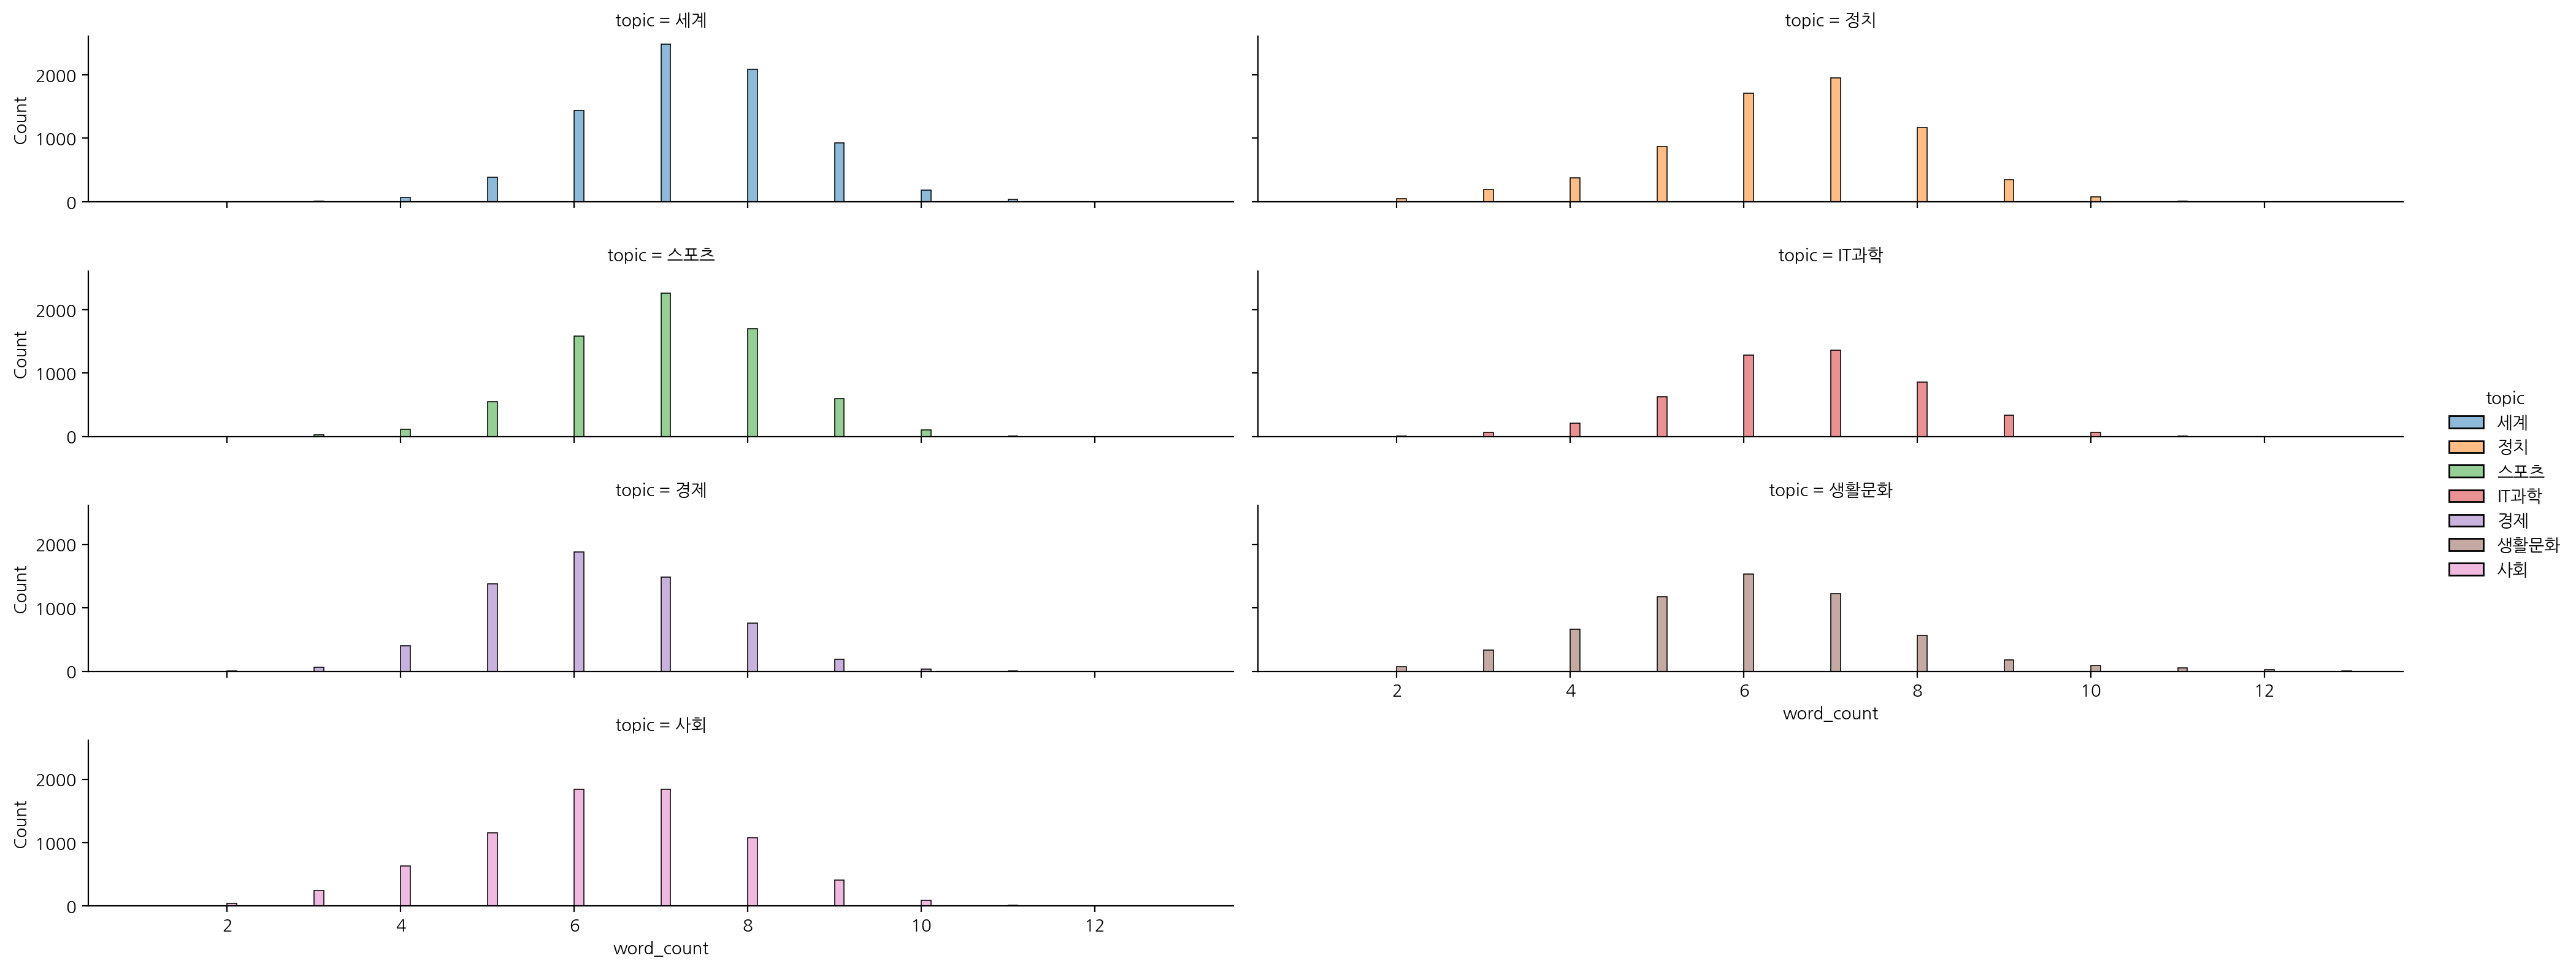

In [25]:
sns.displot(data=df, x='word_count',
            hue='topic', col='topic', col_wrap=2, aspect=5, height=2)
plt.show()

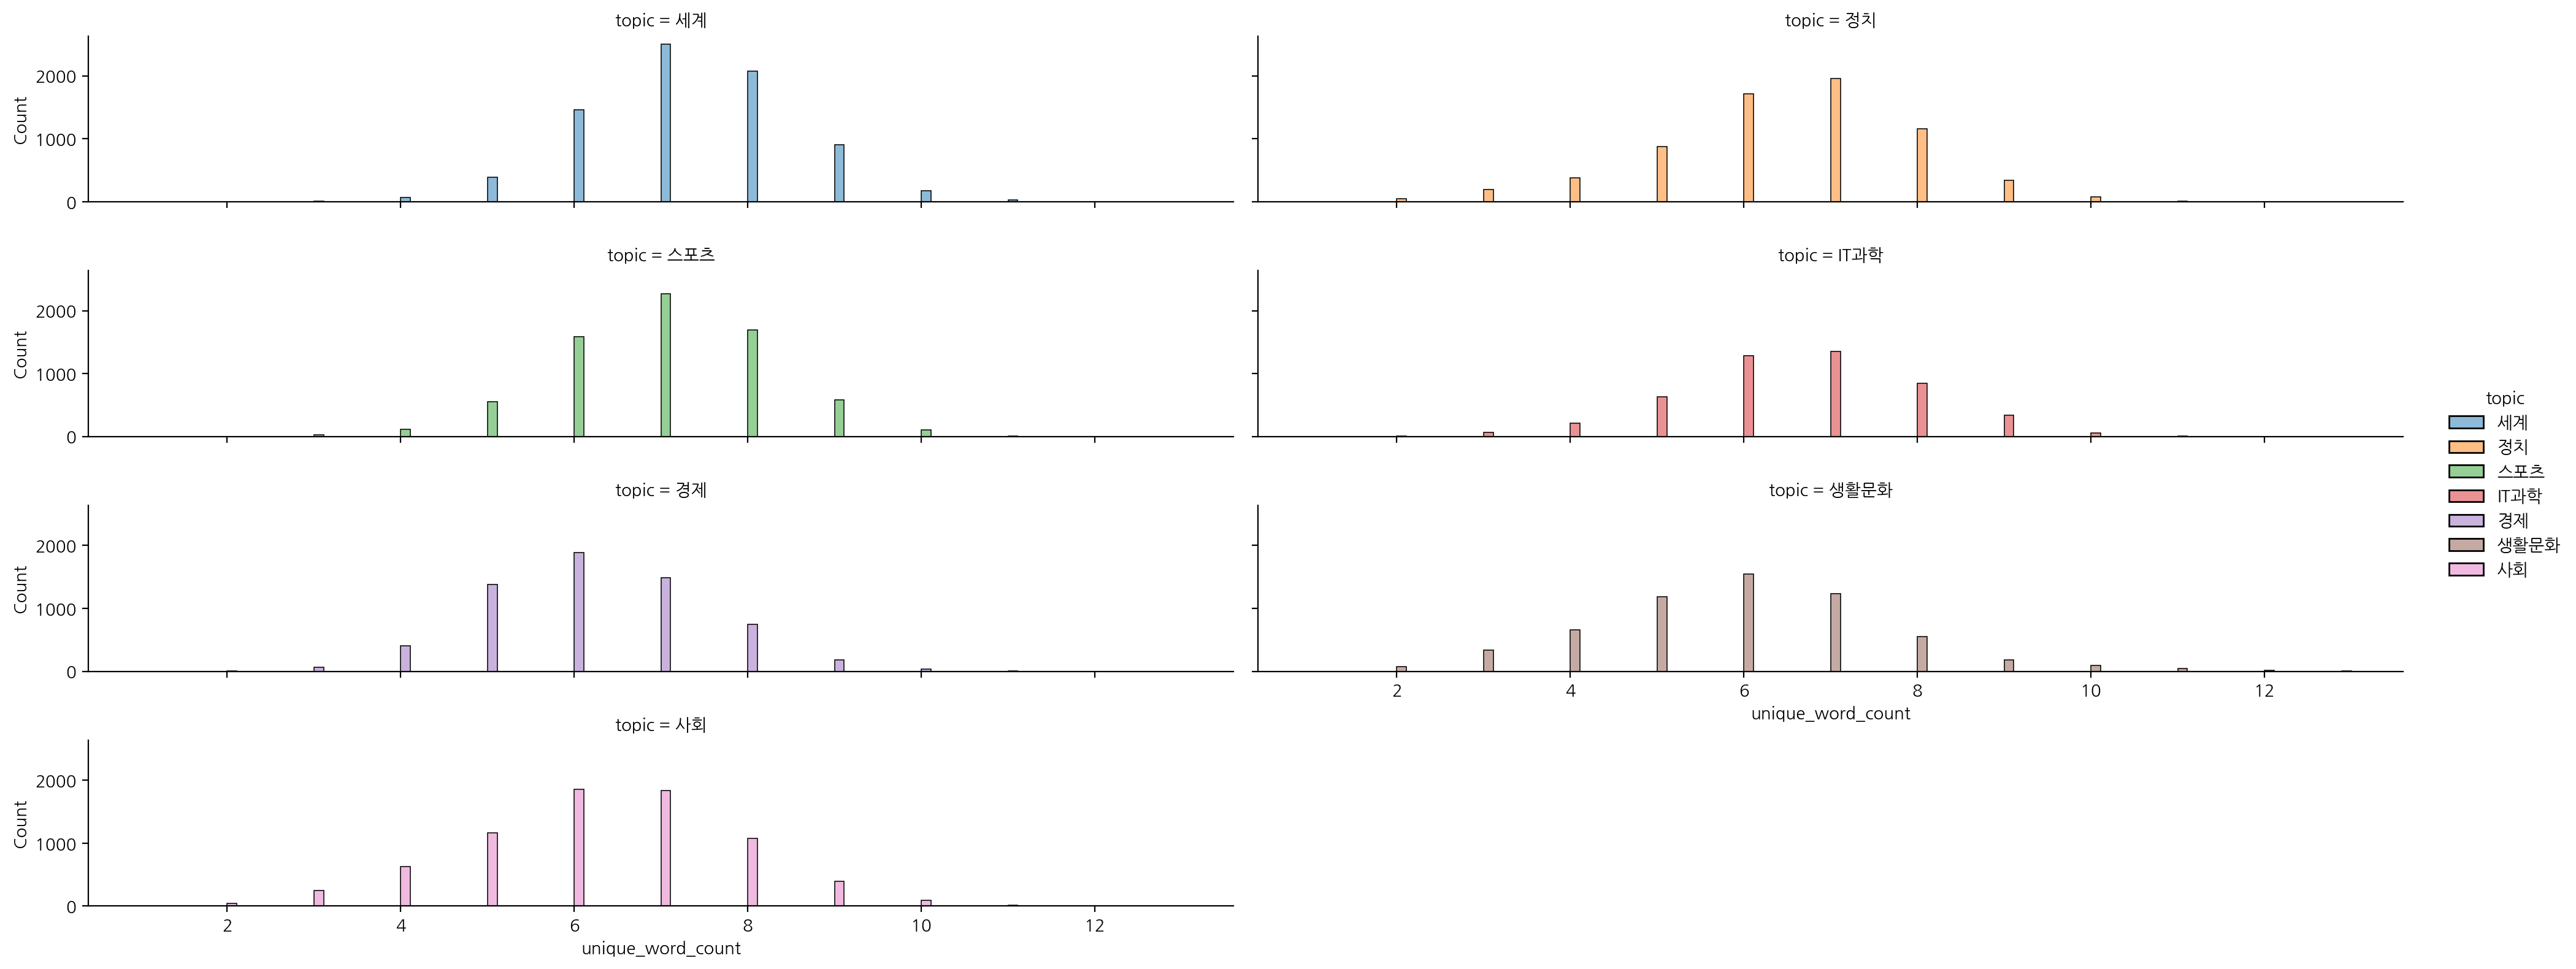

In [26]:
sns.displot(data=df, x='unique_word_count',
            hue='topic', col='topic', col_wrap=2, aspect=5, height=2)
plt.show()

## 문자 전처리하기

In [28]:
import re
# 익명함수인 lambda를 사용해 전처리할 수도 있지만
# Series.str.replace로 쓸 수도 있다
# df['title] = df['title].map(lambda x : re.sub('[0-9]', '', x))
df['title'] = df['title'].str.replace('[0-9]', '', regex=True)

In [29]:
# 영문자는 모두 소문자로 변경
df['title'] = df['title'].str.lower()

In [33]:
# konlypy 설치
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2024-09-26 16:04:35--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1 [following]
--2024-09-26 16:04:35--  https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9b93b1337008077cae5b4d32ff.dl.dropboxusercontent.com/cd/0/inline/CbX7XGWEBmVbYF0urzLTTSnM_VGzdA9QDlI0OcpiPzFSBIAkHTv6L8Np0ZIbUAv49hNzKRVjYAmDlhIO1q_vPCo31L1-NAXYsJqsRL0RxwIfq67sjLBuPXb6bGCh0AHne-iU5JSVSdhiBD5sHzIVh9Yx/file?dl=1# [following]
--2024-09-26 16:04:36--  https://uc9

In [37]:
# 형태소 분석기에서 Okt qnffjdhrl
from konlpy.tag import Okt
okt = Okt()

# 조사, 어미, 구두점 제거, 어간 추출
def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation']:
            clean_text.append(word[0])

    return " ".join(clean_text)

from tqdm import tqdm
tqdm.pandas()

train['title'] = train['title'].progress_map(okt_clean)
test['title'] = test['title'].progress_map(okt_clean)

100%|██████████| 9131/9131 [00:13<00:00, 673.35it/s]


In [38]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['합니다','하는','할','하고','한다','그리고','입니다','그 ',' 등','이런',' 것 ',' 및 ',' 제 ',' 더 ']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

df['title'] = df['title'].map(remove_stopwords)
df.head()

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,nyt 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7


## 학습, 시험 데이터 세트 분리하기

In [40]:
target = 'topic_idx'
train = df[df[target].notnull()]
test = df[df[target].isnull()]
train.shape, test.shape

((45654, 7), (9131, 7))

In [41]:
x_train = train['title']
x_test = test['title']

x_train.shape, x_test.shape

((45654,), (9131,))

In [42]:
# 학습 데이터 세트 확인
y_train = train[target]
y_train.value_counts()

,count
topic_idx,
4.0,7629
2.0,7362
5.0,6933
6.0,6751
1.0,6222
3.0,5933
0.0,4824


In [43]:
# 시험 데이터 세트 확인
y_test = test[target]
y_test.value_counts()

,count
topic_idx,


## 단어 벡터화하기

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=None,
                            ngram_range = (1,2),
                            min_df = 3,
                            max_df = 0.95)

tfidf_vect.fit(x_train)

TfidfVectorizer(max_df=0.95, min_df=3, ngram_range=(1, 2))

In [45]:
# transform()으로 단어 문서 행렬로 변환
# transform() 이후에는 행렬로 변환되어 숫자 형태로 변경되는데 그 결과는 feature_tfidf로 받음

train_feature_tfidf = tfidf_vect.transform(x_train)
test_feature_tfidf = tfidf_vect.transform(x_test)

train_feature_tfidf.shape, test_feature_tfidf.shape

((45654, 22377), (9131, 22377))

In [46]:
# 생성된 단어 사전을 참고하기
vocab = tfidf_vect.get_feature_names_out()
print(len(vocab))
vocab[:10]

22377


array(['aa로', 'abs', 'acl', 'afc', 'afc 챔스리그', 'afc 챔피언십', 'afc 회장', 'ag',
       'ag 우승', 'ai'], dtype=object)

In [47]:
# 전체 단어 사전에서 가중치 값의 합계를 살피기
dist = np.sum(train_feature_tfidf, axis=0)

vocab_count = pd.DataFrame(dist, columns=vocab)
vocab_count

,aa로,abs,acl,afc,afc 챔스리그,afc 챔피언십,afc 회장,ag,ag 우승,ai,...,힘으로,힘은,힘이,힘입어,힘찬,힙합,女농구대표팀,女배구,女배구 대표팀,ｍ짜리
0,1.374165,1.493937,4.560771,10.036045,3.516982,2.254818,1.220953,14.847285,1.557569,74.285975,...,4.326381,3.062647,1.748944,2.051542,2.495783,1.965046,1.537386,8.787677,2.478833,1.40821


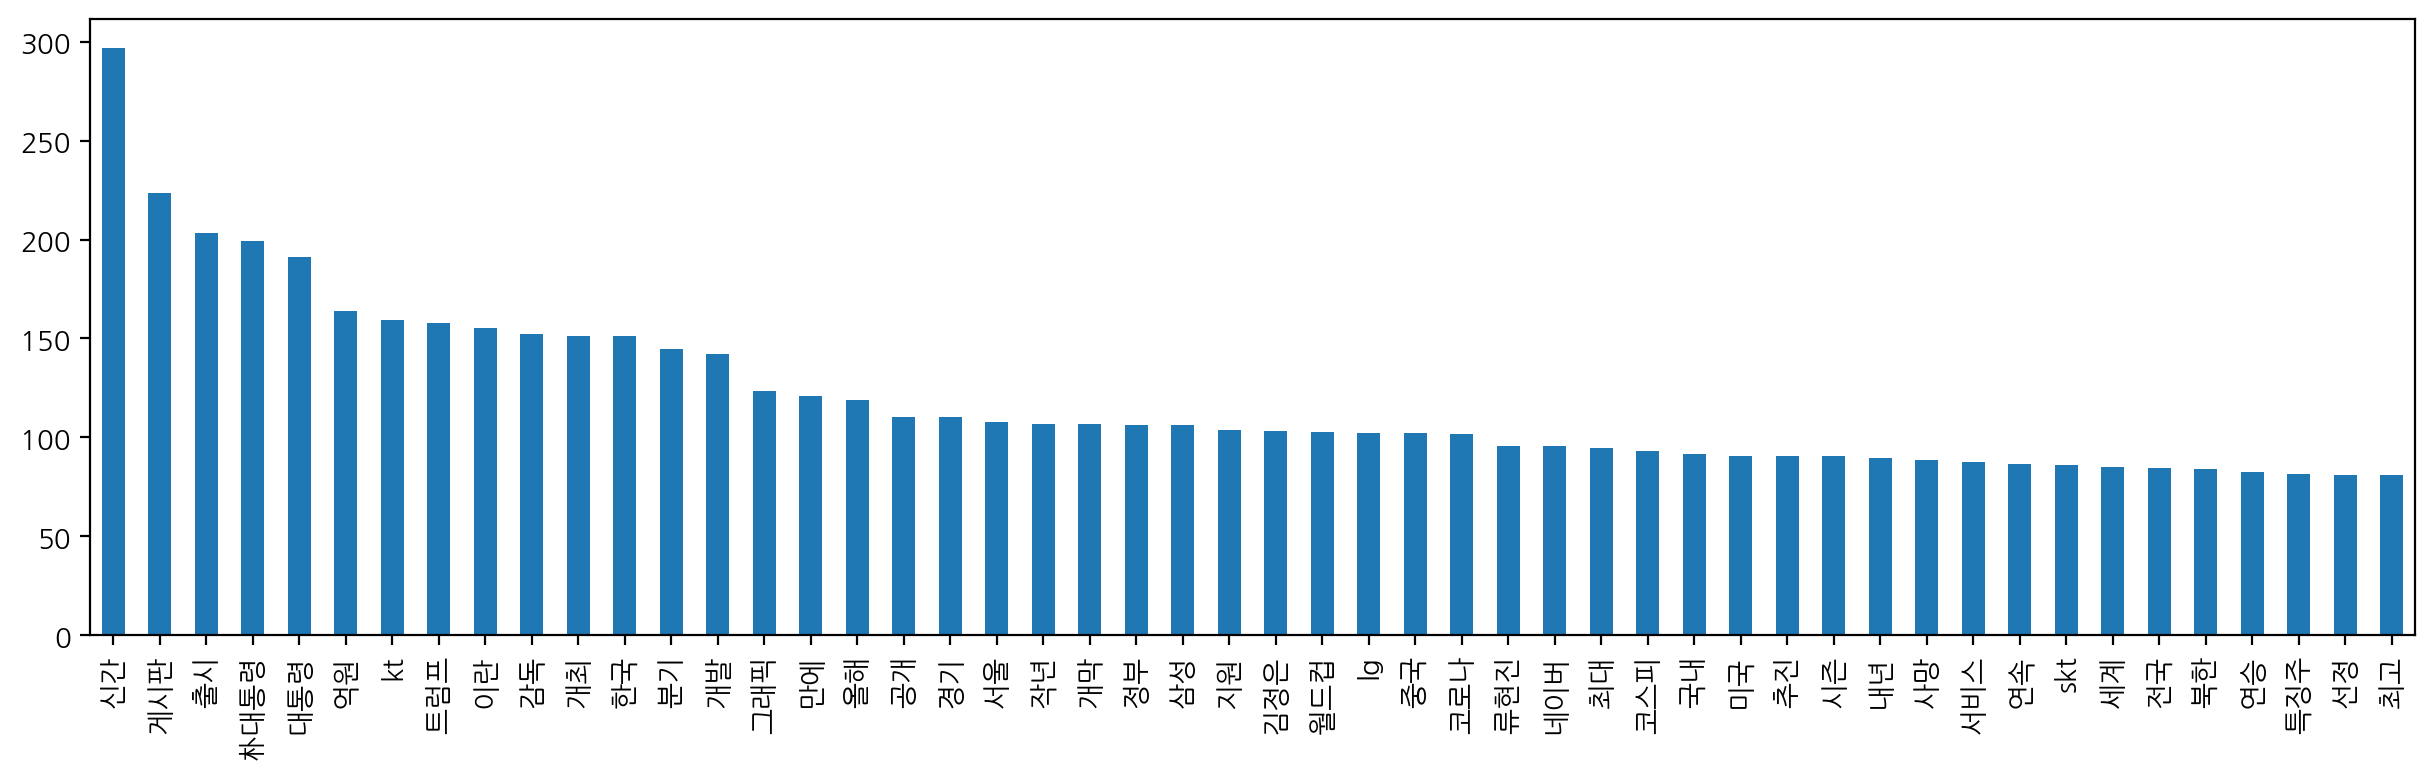

In [48]:
vocab_count.T[0].sort_values(ascending=False).head(50).plot.bar(figsize=(15,4))
plt.show()

## 학습과 예측하기

In [50]:
# RandomForestClassifier를 불러온다
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류기를 사용한다
model = RandomForestClassifier(n_estimators = 100,
                               n_jobs = -1,
                               random_state = 42)
model

RandomForestClassifier(n_jobs=-1, random_state=42)

In [52]:
# 교차 검증
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model,
                           train_feature_tfidf,
                           y_train,
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  7.3min finished


In [53]:
# 교차 검증의 측정 지표로 정확도를 사용
# y_train에 정답값이 있기 때문에 실제값과 예측값의 맞고 틀림의 정도를 나타낼 수 있다.

valid_accuracy = (y_pred == y_train).mean()
valid_accuracy

0.7384676041529767

In [54]:
df_accuracy = pd.DataFrame({'pred': y_pred, 'train': y_train})
df_accuracy['accuracy'] = (y_pred == y_train)

In [55]:
# fit으로 학습
%time model.fit(train_feature_tfidf, y_train)

CPU times: user 4min 46s, sys: 1.4 s, total: 4min 47s
Wall time: 3min 3s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [56]:
# model.predict()로 정확도를 예측한다

y_predict = model.predict(test_feature_tfidf)
y_predict[:5]

array([2., 3., 2., 2., 3.])